# Week-7

Decision trees and KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [2]:
from math import log2
### Solution ###
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -(p*log2(p) + (1-p)*log2(1-p))

In [3]:
entropy(200/1000)

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

In [4]:
### Solution ###
entropy(0.5)

1.0

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [5]:
### Solution ###
def IG(E, El, Er, gamma):
    return E - (gamma*El + (1-gamma)*Er)

In [6]:
E = entropy(0.2)
El = entropy(0.5)
Er = entropy(150/900)
IG(E, El, Er, 0.1)

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$. 

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [7]:
### Solution ###
400/700, 100/700

(0.5714285714285714, 0.14285714285714285)

### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

In [8]:
import random

### Solution ###
qs = [random.randint(100, 400-1) for i in range(100)]
qs.sort()

In [9]:
igs = []
E = entropy(0.4)

for q in qs:
    El = entropy(q/700)
    Er = entropy((400 - q)/300)
    igs.append(IG(E, El, Er, 0.7))

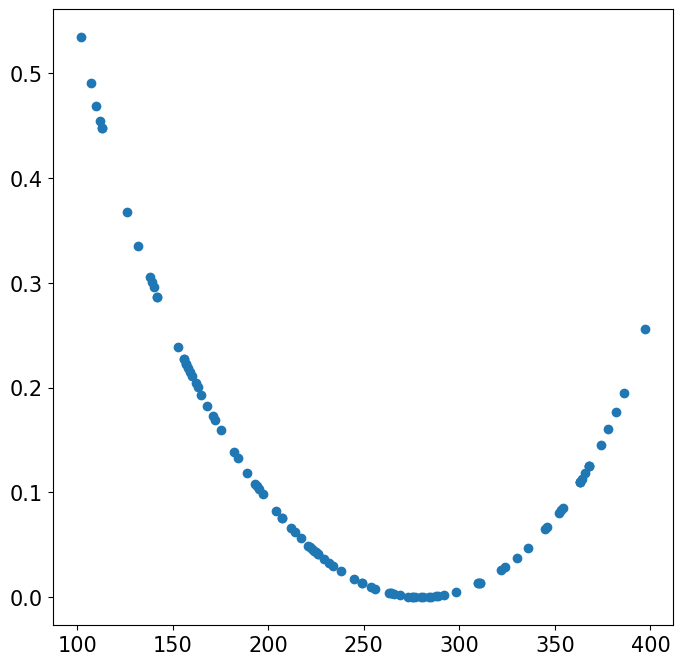

In [10]:
plt.scatter(qs, igs)

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [11]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

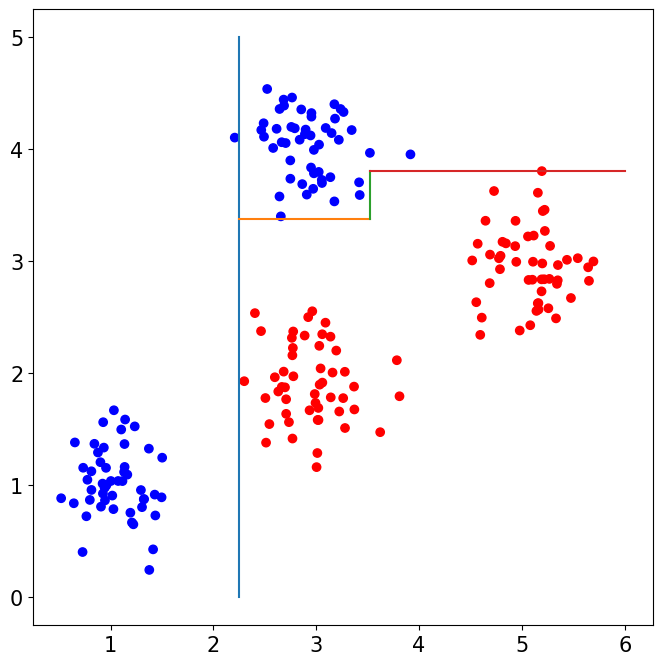

In [12]:
### Solution ###
colors = np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c = colors[y])
plt.plot([2.2446241983360973,2.2446241983360973], [0, 5])
plt.plot([2.2446241983360973, 3.522783872959189], [3.3787665016173105, 3.3787665016173105])
plt.plot([3.522783872959189, 3.522783872959189], [3.3787665016173105, 3.8062306040386096])
plt.plot([3.522783872959189, 6], [3.8062306040386096, 3.8062306040386096])
plt.show()

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [13]:
### Solution ###
def best_split(X, y):
    p = X[y == 1].shape[0] / X.shape[0] if X.shape[0] > 0 else 0
    E = entropy(p)

    feat_best, value_best, ig_best = 0, 0, 0
    for feat in [0, 1]:
        min_v, max_v = X[:, feat].min(), X[:, feat].max()
        vals = np.linspace(min_v, max_v, 10)
        for val in vals:
            left = y[X[:, feat] < val]
            right = y[X[:, feat] >= val]
            gamma = left.shape[0] / X.shape[0]
            q = r = 0
            if left.shape[0] > 0:
                q = left[left == 1].shape[0] / left.shape[0]
            if right.shape[0] > 0:
                r = right[right == 1].shape[0] /right.shape[0]
            El = entropy(q)
            Er = entropy(r) if r > 0 else 1
            ig = IG(E, El, Er, gamma)
            if ig > ig_best:
                ig_best = ig
                feat_best = feat
                value_best = val

    return feat_best, value_best, ig_best

In [14]:
best_split(X, y)

(0, 2.2446241983360977, 0.31925145895127793)

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [15]:
### Solution ###
tree = dict()

def grow_tree(X, y, key = 0):
    p = X[y == 1].shape[0] / X.shape[0]
    E = entropy(p)

    if E <= 0.2:
        label = 1 if (y[y == 1].shape[0] / y.shape[0] > 0.5) else 0
        tree[key] = {'state': 'leaf', 'label': label}
        return

    feat_best, value_best, ig_best = best_split(X, y)
    tree[key] = {'state': 'internal', 'question': [feat_best, value_best]}
    left_ind = X[:, feat_best] < value_best
    right_ind = X[:, feat_best] >= value_best
    X_left = X[left_ind]
    y_left = y[left_ind]
    X_right = X[right_ind]
    y_right = y[right_ind]

    grow_tree(X_left, y_left, key=2*key + 1)
    grow_tree(X_right, y_right, key=2*key + 2)

In [16]:
grow_tree(X, y)

In [17]:
tree

{0: {'state': 'internal', 'question': [0, 2.2446241983360977]},
 1: {'state': 'leaf', 'label': 1},
 2: {'state': 'internal', 'question': [1, 3.41286982297988]},
 5: {'state': 'leaf', 'label': 0},
 6: {'state': 'internal', 'question': [0, 3.689767380767967]},
 13: {'state': 'leaf', 'label': 1},
 14: {'state': 'internal', 'question': [1, 3.8420061605834355]},
 29: {'state': 'leaf', 'label': 0},
 30: {'state': 'leaf', 'label': 1}}

### Problem-9

Predict the label of the point $(3, 4)$.

In [18]:
def predict(x):
    temp_tree = tree
    key = 0
    while True:
        state = temp_tree[key]["state"]
        if state == "leaf":
            return "green" if temp_tree[key]["label"] else "red"
        else:
            feat, val = temp_tree[key]["question"]
            if feat:
                if x[1] < val:
                    key = 2 * key + 1
                else:
                    key = 2 * key + 2
            else:
                if x[0] < val:
                    key = 2 * key + 1
                else:
                    key = 2 * key + 2

In [19]:
### Solution ###
predict(np.array([3, 4]))

'green'

### Problem-10

Plot the decision boundary.

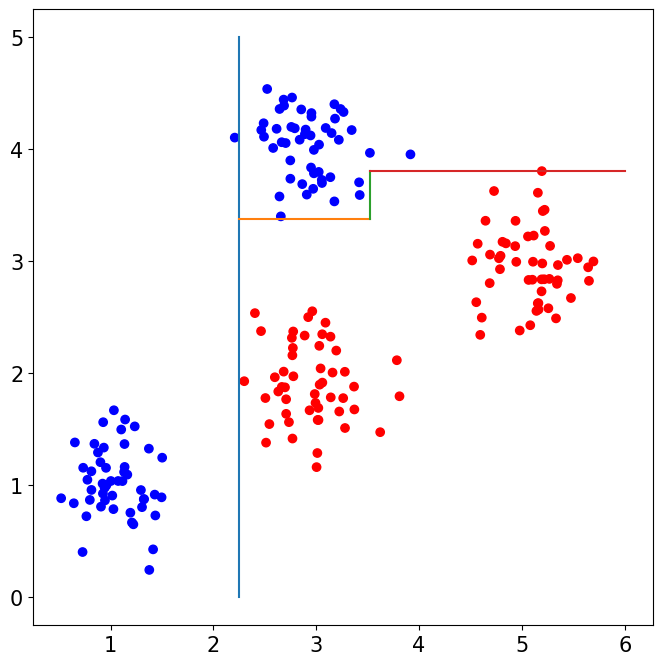

In [20]:
### Solution ###
colors = np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c = colors[y])
plt.plot([2.2446241983360973,2.2446241983360973], [0, 5])
plt.plot([2.2446241983360973, 3.522783872959189], [3.3787665016173105, 3.3787665016173105])
plt.plot([3.522783872959189, 3.522783872959189], [3.3787665016173105, 3.8062306040386096])
plt.plot([3.522783872959189, 6], [3.8062306040386096, 3.8062306040386096])
plt.show()

## KNN


In [21]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X, 
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)), 
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

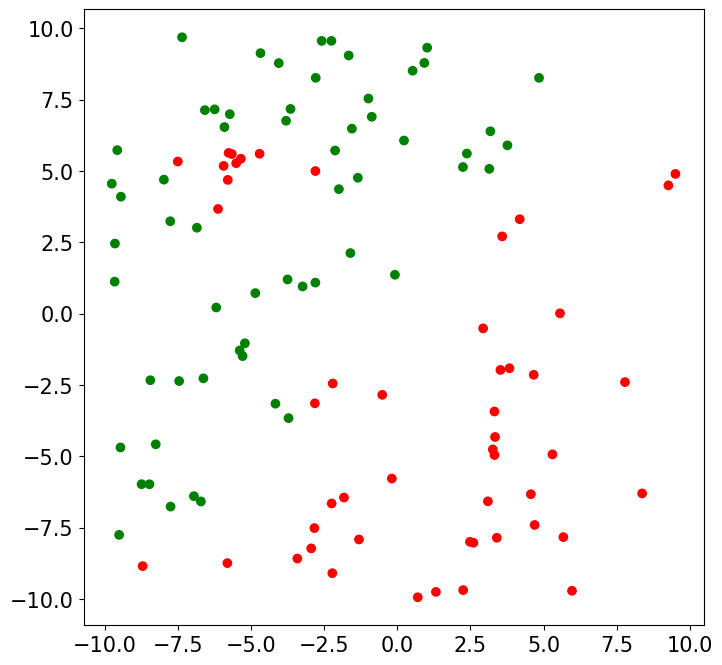

In [22]:
### Solution ###
colors = np.array(["red", "green"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])

### Problem-12

Write a function `predict` that accepts the following arguments: 

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [23]:
np.linalg.norm(X.T-np.array([[-3,-2]]).T, axis=1)

array([52.25189265, 67.44780992])

In [24]:
### Solution ###
def predict(X, y, x_test, k):
    dist = np.linalg.norm(X.T - x_test, axis=0) ** 2
    idx = np.argpartition(dist, k)[:k]

    return "green" if int(np.mean(y[idx]) >= 0.5) else "red"

In [25]:
predict(X, y, x_test=np.array([[-3,-2]]).T, k=10)

'green'

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

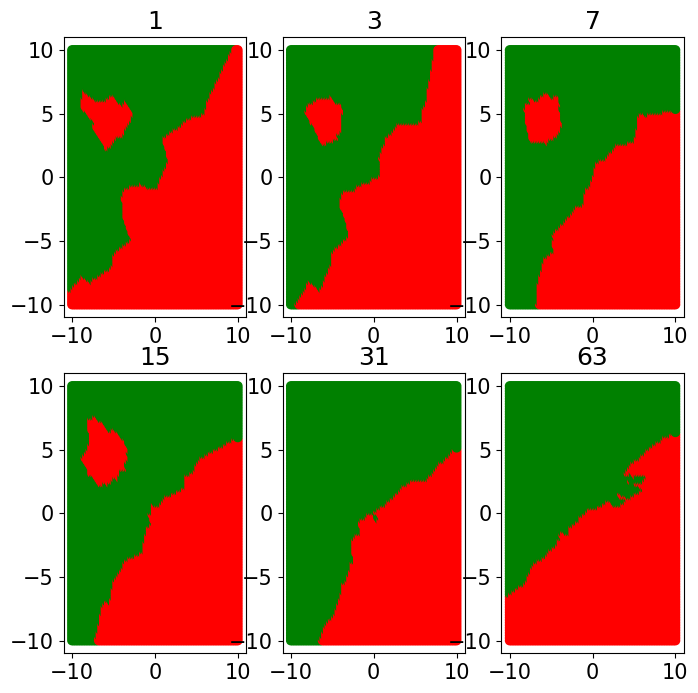

In [26]:
### Solution ###
def diagram(k):
    x = np.linspace(-10, 10, 100)
    points = []
    colors = []
    for i in range(100):
        for j in range(100):
            points.append([x[i], x[j]])
            colors.append(predict(X, y, np.array([[x[i], x[j]]]).T, k))
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], c=colors)
    plt.title(k)

for i, k in enumerate([1,3,7,15,31,63]):
    plt.subplot(2,3,i+1)
    diagram(k)